<a href="https://colab.research.google.com/github/victorhcunha/k-nearest-neighbors/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns # (documentação seaborn https://seaborn.pydata.org/generated/seaborn.pairplot.html)
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance


# Carregando base de dados

In [2]:
# Carregando a base de dados:
data = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Mostrando informações da base de dados:
data.info()

# Mostrando os dados:
print(data)

# Mostrando a quantidade por espécie (classe)
data.groupby('class').size()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7        

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

##Tratando os dados

In [3]:
# Dividindo os valores em features e classes
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
valuesFeatures = data[features].values
valuesClass = data['class'].values

# Transformando as classes em numeros (Iris-setosa => 0, Iris-versicolor => 1, Iris-virginica => 2)
le = LabelEncoder()
valuesClass = le.fit_transform(valuesClass)

# Mostrando os valores
print(valuesClass)
print(valuesFeatures)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

##Dividindo os dados (treino x teste)

In [4]:
# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(valuesFeatures,valuesClass,test_size=0.25) #25% para teste

# Mostrando a forma dos dados:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(112, 4) (38, 4)
(112,) (38,)


#Visualização gráfica de dados

<Figure size 432x288 with 0 Axes>

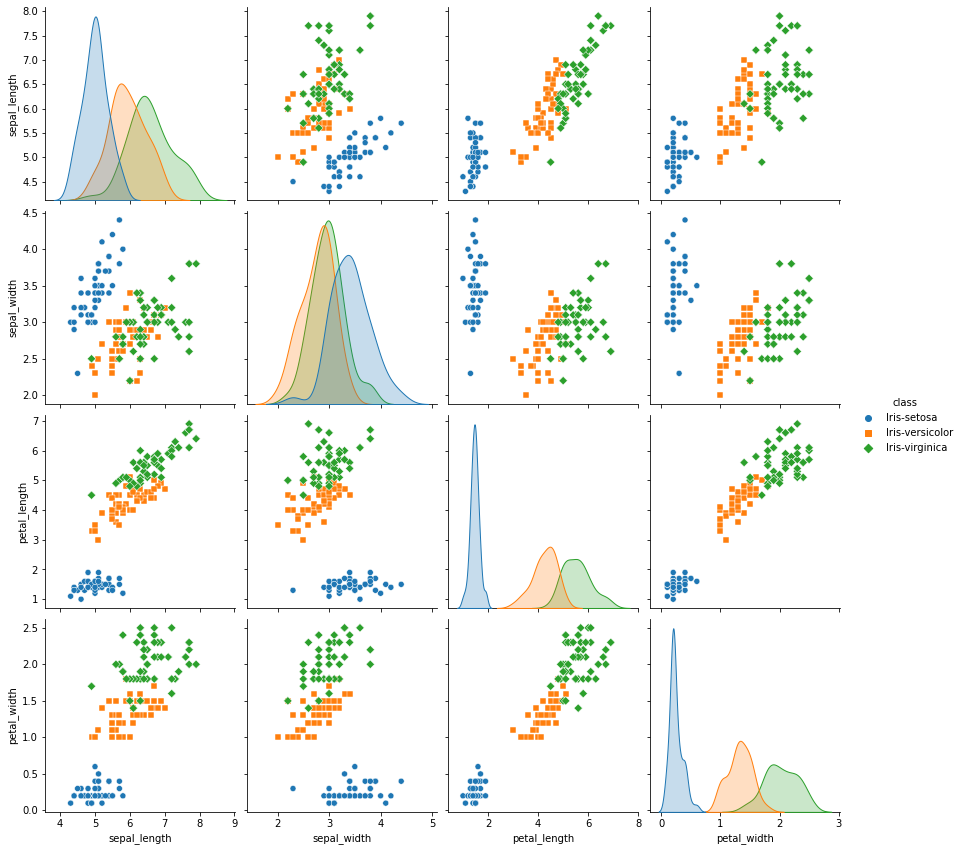

In [5]:
# Visualização gráfica dos dados:
plt.figure()
sns.pairplot(data, hue = "class", height=3, markers=["o", "s", "D"]) #o=circulo, s=quadrado, D=diamante
plt.show()

#K Neighbors (com sklearn.neighbors)

In [6]:
# Instanciando o crasificador (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
classifier.fit(X_train, y_train)

# Fazendo a previsão os dados de teste
y_pred = classifier.predict(X_test)

# Imprimindo o resultado da previsão e as classes originais dos dados de teste
print("Previsão:\n" + str(y_pred))
print("Originais:\n" + str(y_test))

#Calculando a acurácia
acuracia = accuracy_score(y_test, y_pred)*100
print('A acurácia do modelo é igual a ' + str(round(acuracia, 5)) + ' %.')

Previsão:
[1 0 1 1 2 1 2 0 1 2 1 2 0 1 1 1 0 2 2 2 1 0 1 2 0 0 1 2 0 2 0 0 1 0 0 0 1
 2]
Originais:
[1 0 1 1 2 1 2 0 1 2 1 2 0 1 1 1 0 2 2 2 1 0 1 1 0 0 1 1 0 2 0 0 1 0 0 0 1
 2]
A acurácia do modelo é igual a 94.73684 %.


##Calculando a acurácia para  k=1, 3, 5, 7 e 9

In [7]:
for i in [1, 3, 5, 7, 9]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acuracia = accuracy_score(y_test, y_pred)*100
  print('A acurácia do modelo com k=' + str(i) + ' é igual a ' + str(round(acuracia, 5)) + '%.')



A acurácia do modelo com k=1 é igual a 92.10526%.
A acurácia do modelo com k=3 é igual a 94.73684%.
A acurácia do modelo com k=5 é igual a 94.73684%.
A acurácia do modelo com k=7 é igual a 97.36842%.
A acurácia do modelo com k=9 é igual a 94.73684%.


#Kneighbors (sem sklearn.neighbors)

In [8]:
"""
X_train = conjunto de treino com as features
y_train = conjunto de treino com as classes
X_test = conjunto de teste com as features
k = k mais próximo
"""
def kneighbors(X_train,y_train,X_test,k):
  #seleciona o primeiro elemento da lista de teste para fazer sua previsão unitária 
  element = X_test[0]

  #calculando a distância euclidiana entre o elemento selecionado e todos os elementos de features de treino
  #a lista distanceValues recebe uma sublista com a distancia calculada e a classe de treino respectiva
  distanceValues = []
  for i in range(0, len(X_train) - 1):
    distanceValues.append([distance.euclidean(X_train[i],element),y_train[i]])

  #ordena os elementos da lista distanceValues em ordem crescente
  #value recebe apenas os k primeiros elementos da lista
  value = sorted(distanceValues)[:k]

  #value passa a receber apenas as classes (descartando as distâncias)
  for  i in range(0,k):
    _, value[i] = value[i]

  #value deixa de ser uma lista e passa a receber apenas o elemento (a classe) mais frequente
  #essa classe é a previsãopara o elemento escolhido em "element = X_test[0]"
  value = most_frequent(value)

  #se o elemento for o último, sua previsão é retornada e o algoritmo é encerrado
  #se houverem mais, o algoritmo é executado mais vezes, recursivamente
  if len(X_test) == 1:
    return [value]
  else:
    return [value] + kneighbors(X_train,y_train,X_test[1:],k)


"""
recebe uma lista e retorna o seu valor mais frequente
ex: [1,2,2] -> retorna 2
código disponível em https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/
"""
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
    return num



##Calculando a acurácia para  k=1, 3, 5, 7 e 9

In [9]:
for k in [1, 3, 5, 7, 9]:
  classifier = kneighbors(X_train,y_train,X_test,k)
  acuracia = accuracy_score(list(y_test), classifier)*100
  print('A acurácia do modelo com k=' + str(k) + ' é igual a ' + str(round(acuracia, 5)) + '%.')

A acurácia do modelo com k=1 é igual a 92.10526%.
A acurácia do modelo com k=3 é igual a 94.73684%.
A acurácia do modelo com k=5 é igual a 94.73684%.
A acurácia do modelo com k=7 é igual a 97.36842%.
A acurácia do modelo com k=9 é igual a 94.73684%.
